In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import haversine as hs

In [3]:
data = pd.read_excel(r"C:\Users\ank\Desktop\transaction.xlsx")

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
pd.DataFrame({'Columns':data.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


# Basic data check

In [6]:
data.shape

(12043, 23)

In [7]:
data.customer_id.nunique()

100

We can see that there are 100 unique customers

In [8]:
data.transaction_id.nunique()

12043

In [9]:
data.date.describe()

<ipython-input-9-2cb626a5e644>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [10]:
pd.date_range(start =  '2018-08-01', end = '2018-10-31').difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

This is date that is missing from the Date column in the data set. As adding all days in months leads to 92 but we can find only 91 unique values.

# Missing values

In [11]:
missing = data.isnull().sum()
missing = missing[missing>0]
percentage = round( missing/len(data),3)*100
pd.DataFrame({'Number of missing values ': missing, 'Percentage' : percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


bpay_biller_code and merchant_code has highest percentage of missing values

# Descriptive statistics

In [12]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Here we don't see negative values in age and amount column. Hence the data is good enough for analysis.

We can see there is huge difference between minimum and maximum of balance and amount columns. We will analyse the data set and find the causes.

# Exploratory Data Analysis (EDA) 

## 1) Categorical Variables

### Status

In [13]:
data.status.value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

C:\Users\ank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

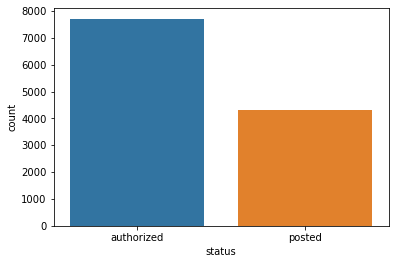

In [14]:
sns.countplot(data.status)

It can be seen that majority of transaction status are authorized

### Card present flag 

In [15]:
data.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

In [16]:
data.card_present_flag = data.card_present_flag.replace({1.0: 'No',0.0: 'Yes'})

In [17]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,No,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,Yes,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,No,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,No,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,No,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


I have replaced card present flag values with yes and no. As this column represents whether the car holder or card was physically present at the time of transcation or the transaction was remote

### Currency

In [18]:
data.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

### Long_lat

In [19]:
data.long_lat.value_counts(dropna = False)

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

There are no null values in this column

In [20]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\ank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_description', ylabel='count'>

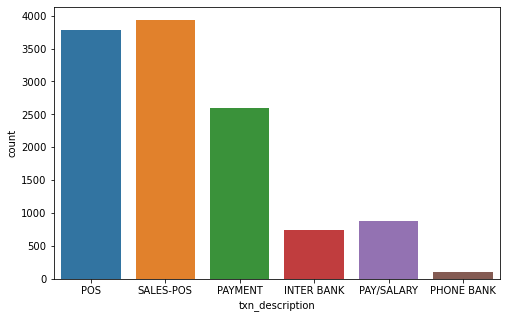

In [113]:
plt.figure(figsize= (8,5))
sns.countplot(data.txn_description)

Most of the transcation consists of payment and sales payment.

Also this might explain large number of null values in merchant code as not all transaction are purchased based

In [22]:
data[["txn_description","amount"]].groupby('txn_description').mean()

,amount
txn_description,
INTER BANK,86.699461
PAY/SALARY,1898.728029
PAYMENT,77.613077
PHONE BANK,106.099010
POS,40.407412
SALES-POS,39.909789


[Text(0.5, 1.0, 'Average transaction volume by category')]

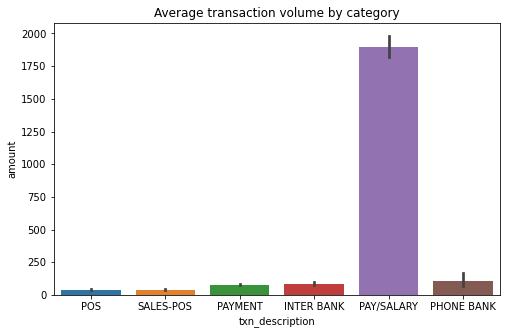

In [23]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'txn_description' , y = 'amount', data = data).set(title = 'Average transaction volume by category')


Pay/Salary has highest average amount as it seems logical because it has largest amount of transactions.

### Gender

In [25]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\ank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

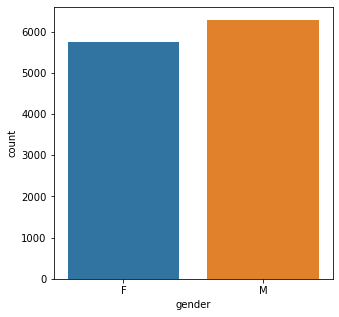

In [30]:
plt.figure(figsize = (5,5))
sns.countplot(data.gender)

In [41]:
data[['gender','amount']].groupby('gender').mean().sort_values(by = 'amount', ascending = False)

,amount
gender,
M,205.721809
F,168.517303


<AxesSubplot:xlabel='gender', ylabel='amount'>

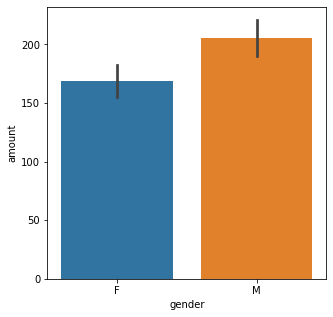

In [39]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'gender', y='amount', data = data)

Male has higher average transactional amount then female

### Merchant Suburb

In [44]:
data.merchant_suburb.value_counts(dropna = False)

NaN              4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
                 ... 
Strahan             1
Mcalinden           1
Jamisontown         1
Double Bay          1
Edinburgh           1
Name: merchant_suburb, Length: 1610, dtype: int64

These are suburbs where transactions were made. It has large number of null values which shows that transaction may be remote.

### Merchant state

In [46]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\ank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='merchant_state', ylabel='count'>

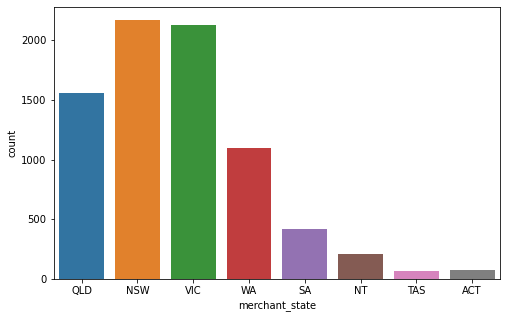

In [72]:
plt.figure(figsize = (8,5))
sns.countplot(data.merchant_state)

[Text(0.5, 1.0, 'Average transaction amount by state')]

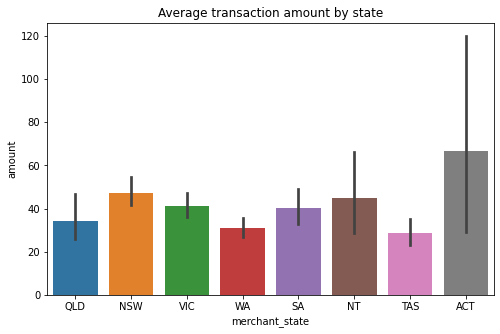

In [52]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'merchant_state', y='amount', data = data).set(title = 'Average transaction amount by state')

ACT state has highest volume of transaction but it can also be seen that the variance is quiet large

### Extraction

In [54]:
data.extraction

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

In [56]:
data[['date','extraction']].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


So only we need to extract from extraction column is the time component.

### Country

In [60]:
data.country.value_counts()

Australia    12043
Name: country, dtype: int64

So this data can be dumped 

### Merchant longitude and latitude

In [63]:
data.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are co-ordinates of Merchant

### Movement with debit or credit

In [64]:
data.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

<AxesSubplot:xlabel='movement', ylabel='count'>

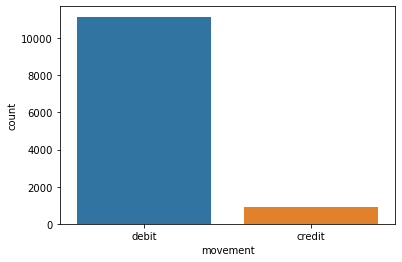

In [78]:
sns.countplot(data.movement)

Most of the transactions are made by debit card. But viewing the average amount of transaction shows different results as seen below.

[Text(0.5, 1.0, 'Average transaction amount by cards')]

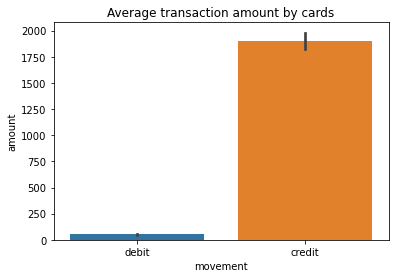

In [82]:
sns.barplot(x = 'movement', y = 'amount', data = data).set(title = 'Average transaction amount by cards')

Credit card has highest average transaction amount.

## 2) Numerical Variable

### Balance

C:\Users\ank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

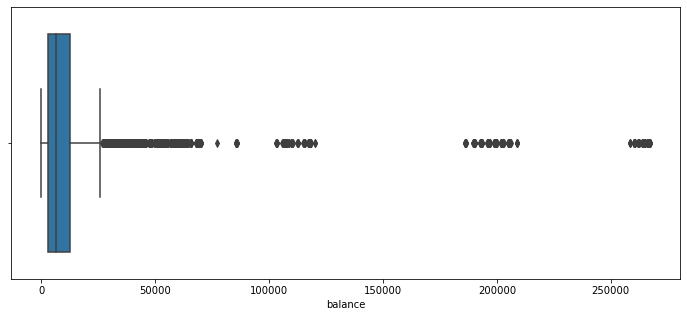

In [85]:
plt.figure(figsize = (12,5))
sns.boxplot(data.balance)

Balance column has a long tail.

### Age of customers

C:\Users\ank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

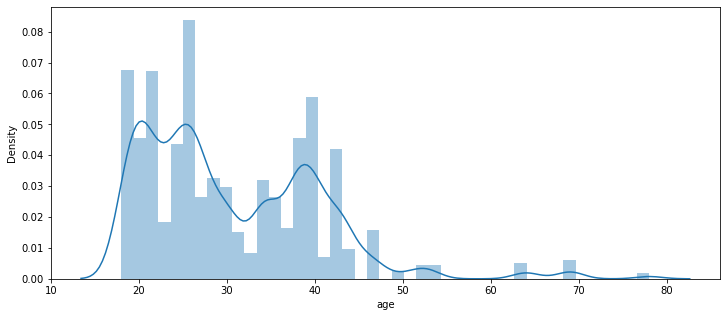

In [93]:
plt.figure(figsize = (12,5))
sns.distplot(data.age)

The peak in histogram are seen for age group og 18-27 and 35-41.

### Transaction amount

C:\Users\ank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

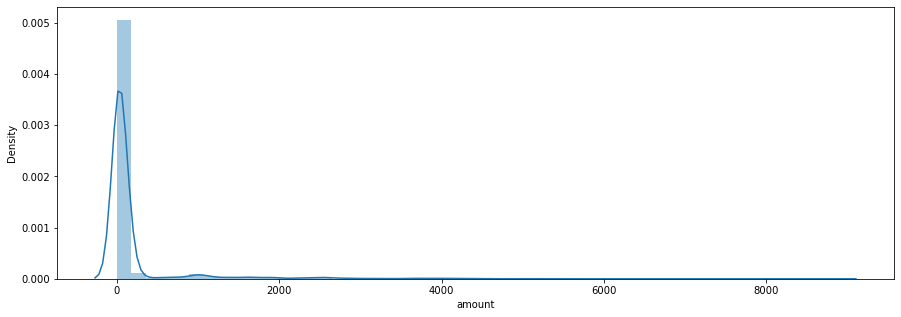

In [100]:
plt.figure(figsize = (15,5))
sns.distplot(data.amount)

In [101]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

# Feature engineering

In this section we will deal with missing values, delete unwanted columns and come up new features for analysis

### Unwanted values

In [108]:
data = data.drop(['country','currency'],axis = 1)
data.shape

(12043, 21)

### Missing values

In [109]:
pd.DataFrame({'Number of missing values ': missing, 'Percentage' : percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


As we discussed, Most of the transaction are salary payment hence there is no merchant involved. Hence there are large number of null values present in this data set.

To analyse our assumption we will take next step as follows:

We will filter out transaction which are not pos or sales-pos.

In [118]:
nonsales = data.loc[(data.txn_description != 'SALES-POS') | (data.txn_description != 'POS'), :]
nonsales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

So our assumtion was right. Filtering all pos-sales and pos values has given us same count of values as above

Columns having null values according to our hypothesis:

    -merchant_suburb       
    -merchant_long_lat     
    -merchant_id           
    -card_present_flag     
    -merchant_state        

In [120]:
col = ['merchant_suburb','merchant_long_lat','merchant_id','card_present_flag','merchant_state']
for cols in col:
    data[cols].fillna("n/a", inplace = True)

In [122]:
missing = data.isnull().sum()
missing = missing[missing>0]
percentage = round( missing/len(data),3)*100
pd.DataFrame({'Number of missing values ': missing, 'Percentage' : percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7


As these columns has highest amount of null values. We choose to drop these two columns.

In [125]:
data = data.drop(['bpay_biller_code','merchant_code'], axis = 1)

In [126]:
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

### Create features

Scaling down from months to days,weeks and hours

In [133]:
date_amount = data[['date','amount']].groupby('date').sum()

In [135]:
date_amount

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50
...,...
2018-10-27,6971.58
2018-10-28,8438.11
2018-10-29,38549.14


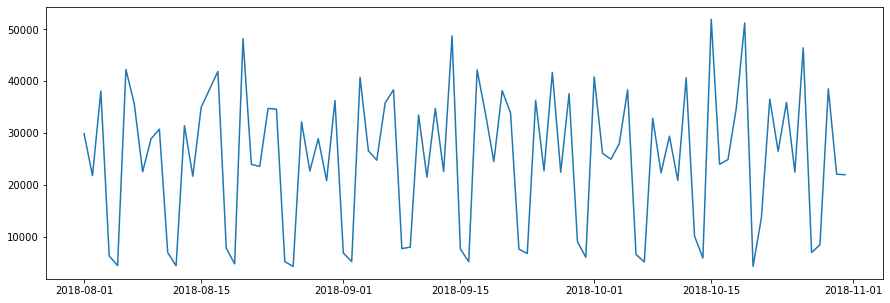

In [137]:
plt.figure(figsize = (15,5))
plt.plot(date_amount.index,date_amount.amount)

Hypothesis for such cyclic increase and decreases is due to:

1) Salary payments are done only on certain days of the week

2) People maybe spending only on week days

Further scaling down.


In [140]:
data['month'] = pd.DatetimeIndex(data.date).month
data['dayofweek'] = pd.DatetimeIndex(data.date).dayofweek
data[['date','month','dayofweek']].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [141]:
data.extraction

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

In [145]:
data['extraction'] = [i.split('T')[1].split(".")[0] for i in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [149]:
data['Hours'] = [i.split(":")[0] for i in data.extraction]
data['Hours'] = pd.to_numeric(data.Hours)

In [150]:
data[['date','month','Hours','dayofweek']].head()

,date,month,Hours,dayofweek
0,2018-08-01,8,1,2
1,2018-08-01,8,1,2
2,2018-08-01,8,1,2
3,2018-08-01,8,1,2
4,2018-08-01,8,1,2


We have made 3 new features:

1) Month

2) Hours

3) Day of week             - where 2 represents tuesday

# Final analysis

As our data has no missing values and all few features are added, We are ready to go with our final analysis

In [152]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,Hours
0,authorized,No,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,Yes,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,No,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,No,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,No,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


In [155]:
purchase_amount = data.loc[(data.txn_description == 'POS') | (data.txn_description == 'SALES-POS'),'amount']
purchase_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\ank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Purchase transaction amount')]

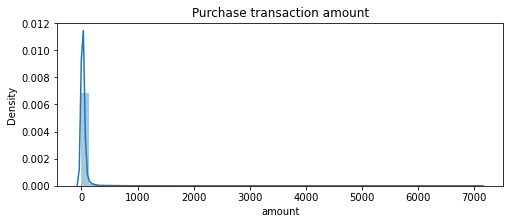

In [162]:
plt.figure(figsize = (8,3))
sns.distplot(purchase_amount).set(title = 'Purchase transaction amount')

C:\Users\ank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Overall transaction amount')]

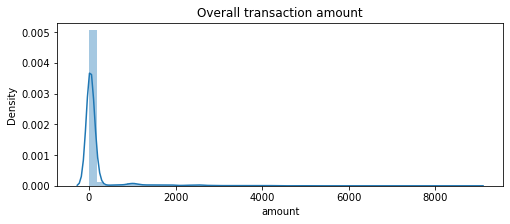

In [161]:
plt.figure(figsize = (8,3))
sns.distplot(data.amount).set(title = 'Overall transaction amount')

As it can be seen that their is more variance in overall transaction amount, it's because of inclusion of salary transcation as the amount in this cases is very huge.

### Transacation volume by customers

In [165]:
customer_transaction = pd.DataFrame(data.groupby('customer_id').amount.sum()/3)
customer_transaction.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


C:\Users\ank\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Average transaction amount for each month')]

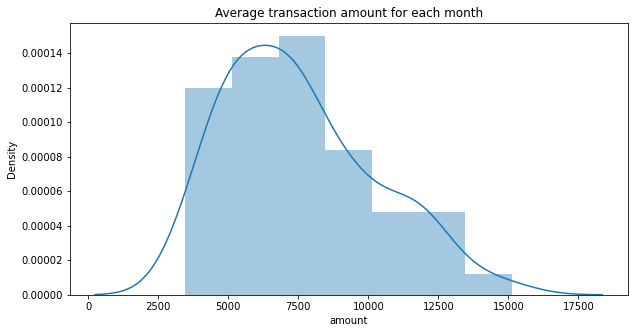

In [167]:
plt.figure(figsize = (10,5))
sns.distplot(customer_transaction.amount).set(title = 'Average transaction amount for each month')

### Transaction volume over time

In [169]:
tran_month = pd.DataFrame(data.groupby('month').amount.sum())
tran_month.head()

,amount
month,
8,729935.52
9,730550.21
10,802798.47


[Text(0.5, 1.0, 'Total transcation amount by month')]

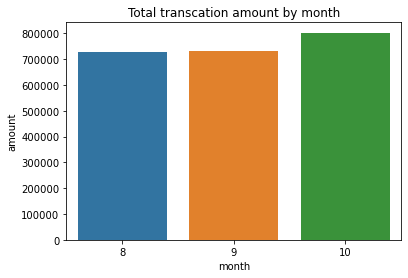

In [173]:
sns.barplot(x = tran_month.index, y = 'amount', data = tran_month).set(title = 'Total transcation amount by month')

[Text(0.5, 1.0, 'Average volume of transcation by month')]

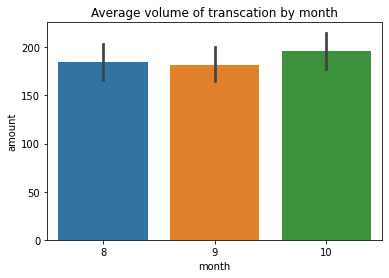

In [174]:
sns.barplot(x = 'month', y = 'amount', data = data).set(title = 'Average volume of transcation by month')

In [175]:
avg_daily_vol = pd.DataFrame(data.groupby('dayofweek').amount.mean())
avg_daily_vol.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 1.0, 'Average volume by days of week')

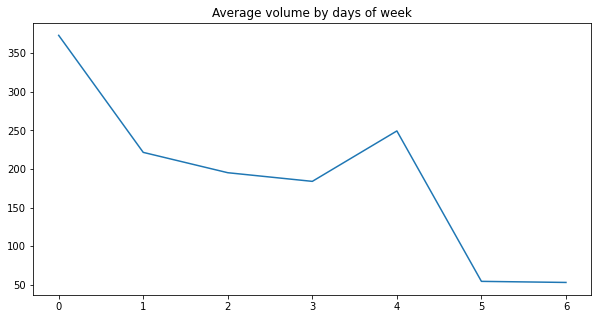

In [178]:
plt.figure(figsize = (10,5))
plt.plot(avg_daily_vol.index,avg_daily_vol.amount)
plt.title('Average volume by days of week')

It can be seen that maximum transactions take place in days other than Friday and Saturday.

To find the cause we categorise the transaction in 3 groups:

1) Salary
2) Purchase
3) Others

In [180]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [181]:
data.loc[data.txn_description == 'PAY/SALARY', 'category'] = "Salary"
data.loc[(data.txn_description == 'SALES-POS') | (data.txn_description == 'POS'), 'category'] = "Purchase"
data.category.fillna('Others',inplace = True)
data[['txn_description','category']].head()

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase


Text(0, 0.5, 'Number of Transactions')

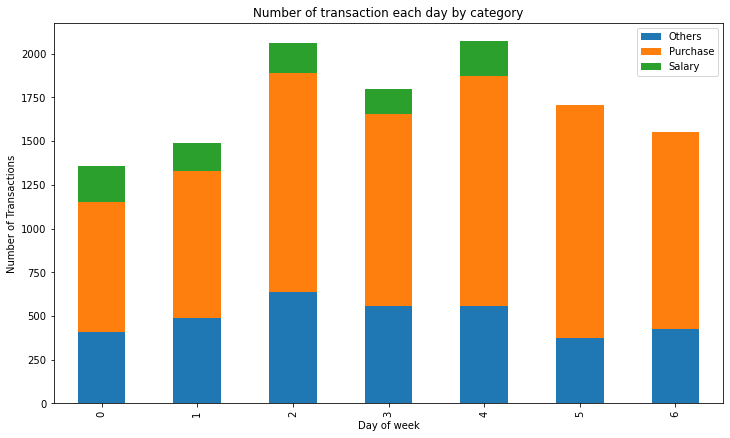

In [188]:
stacked_barplot = pd.DataFrame(data.groupby(['dayofweek','category']).amount.count())
stacked_barplot.unstack().plot(kind = 'bar', stacked = True, figsize = (12,7))
plt.title('Number of transaction each day by category')
plt.legend(['Others','Purchase','Salary'])
plt.xlabel('Day of week')
plt.ylabel('Number of Transactions')


As no salary transaction takes place in Friday and Saturday hence there is decrease in average transcation amount

In [189]:
avg_hour_vol = pd.DataFrame(data.groupby('Hours').amount.mean())
avg_hour_vol.head()

,amount
Hours,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 1.0, 'Average transaction amount by Hour')

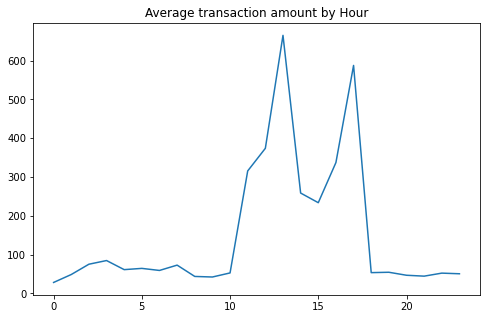

In [192]:
plt.figure(figsize=(8,5))
plt.plot(avg_hour_vol.index,avg_hour_vol.amount)
plt.title('Average transaction amount by Hour')

It can be seen that highest average transaction takes place at the mid day. Exploring it further on the basis of category.

Text(0, 0.5, 'Number of Transactions')

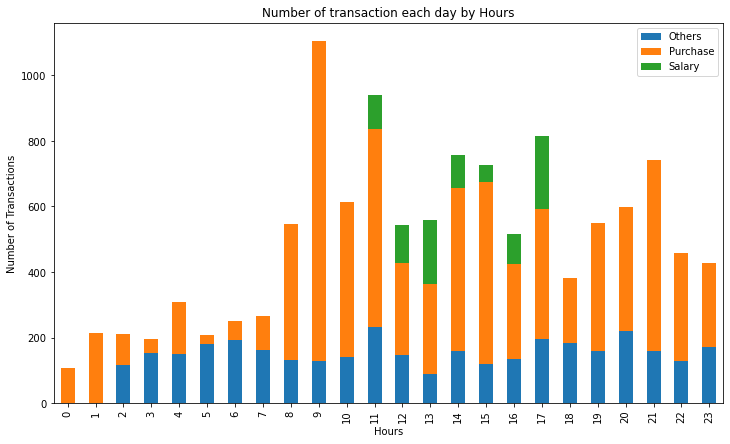

In [194]:
stacked_barplot = pd.DataFrame(data.groupby(['Hours','category']).amount.count())
stacked_barplot.unstack().plot(kind = 'bar', stacked = True, figsize = (12,7))
plt.title('Number of transaction each day by Hours')
plt.legend(['Others','Purchase','Salary'])
plt.xlabel('Hours')
plt.ylabel('Number of Transactions')

As it can be seen that salary transaction takes place at the mid day. Hence there is hike in average amount of transaction at these hours

### Distance between customer and merchant

In [196]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month', 'dayofweek', 'Hours', 'category'],
      dtype='object')

In [197]:
data[['long_lat','merchant_long_lat']].head()

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06


In [205]:
def dist(df):
    return hs.haversine(data["long_lat"], df["merchant_long_lat"])

data["distance(km)"] = data.apply(dist, axis =1)



ValueError: too many values to unpack (expected 2)

In [208]:
data['Distance']

    

KeyError: 'Distance'